<a href="https://colab.research.google.com/github/JohanvandenHeuvel/implementations/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

Create the data

In [2]:
num_datapoints = 100
line = np.arange(num_datapoints)
noise = np.random.normal(loc=0, scale=5, size=num_datapoints)
x = line + noise

slope = 1.5
intercept = 0

y =  intercept + slope * np.append(x, np.flip(x))

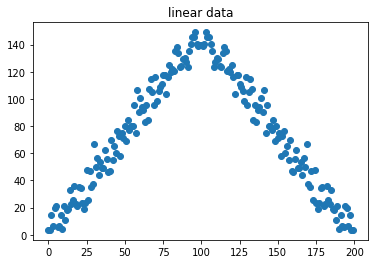

In [3]:
plt.plot(y, 'o')
plt.title("linear data")
plt.show()

Now discretize the data by binning and use the chi-squared test instead 

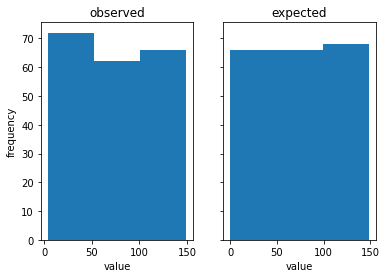

In [32]:
num_bins = 3

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].hist(y, bins=num_bins)
ax[0].set_title("observed")
ax[0].set_xlabel("value")
ax[0].set_ylabel("frequency")

ax[1].hist(intercept + slope * np.append(line, np.flip(line)), bins=num_bins)
ax[1].set_title("expected")
ax[1].set_xlabel("value")

plt.show()

hist, bin_edges = np.histogram(y, bins=num_bins)

In [33]:
data = []
for i in range(len(bin_edges)-1):
  avg = (bin_edges[i] + bin_edges[i+1])/2
  data = np.append(data, np.repeat(avg, hist[i]))

In [34]:
stats.chisquare(data)

Power_divergenceResult(statistic=4334.674481099271, pvalue=0.0)

This test tests if the observed data y has the same frequencies as the expected data, which is equal frequencies in every bin by default. The result seems to be significant, i.e. we can reject the null hypothesis that the observed data is different from the expected data.